In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
with open ('ultimate_data_challenge.json') as f: 
    data = json.load(f)

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [6]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [7]:
df['avg_rating_by_driver'].fillna(round(df['avg_rating_by_driver'].mean(),2), inplace = True)

In [8]:
df['phone'].value_counts().index[0]

'iPhone'

In [9]:
df['phone'].fillna(df['phone'].value_counts().index[0], inplace = True)

In [10]:
df['avg_rating_of_driver'].fillna(round(df['avg_rating_of_driver'].mean(),2), inplace = True)

In [11]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778166,4.601306,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


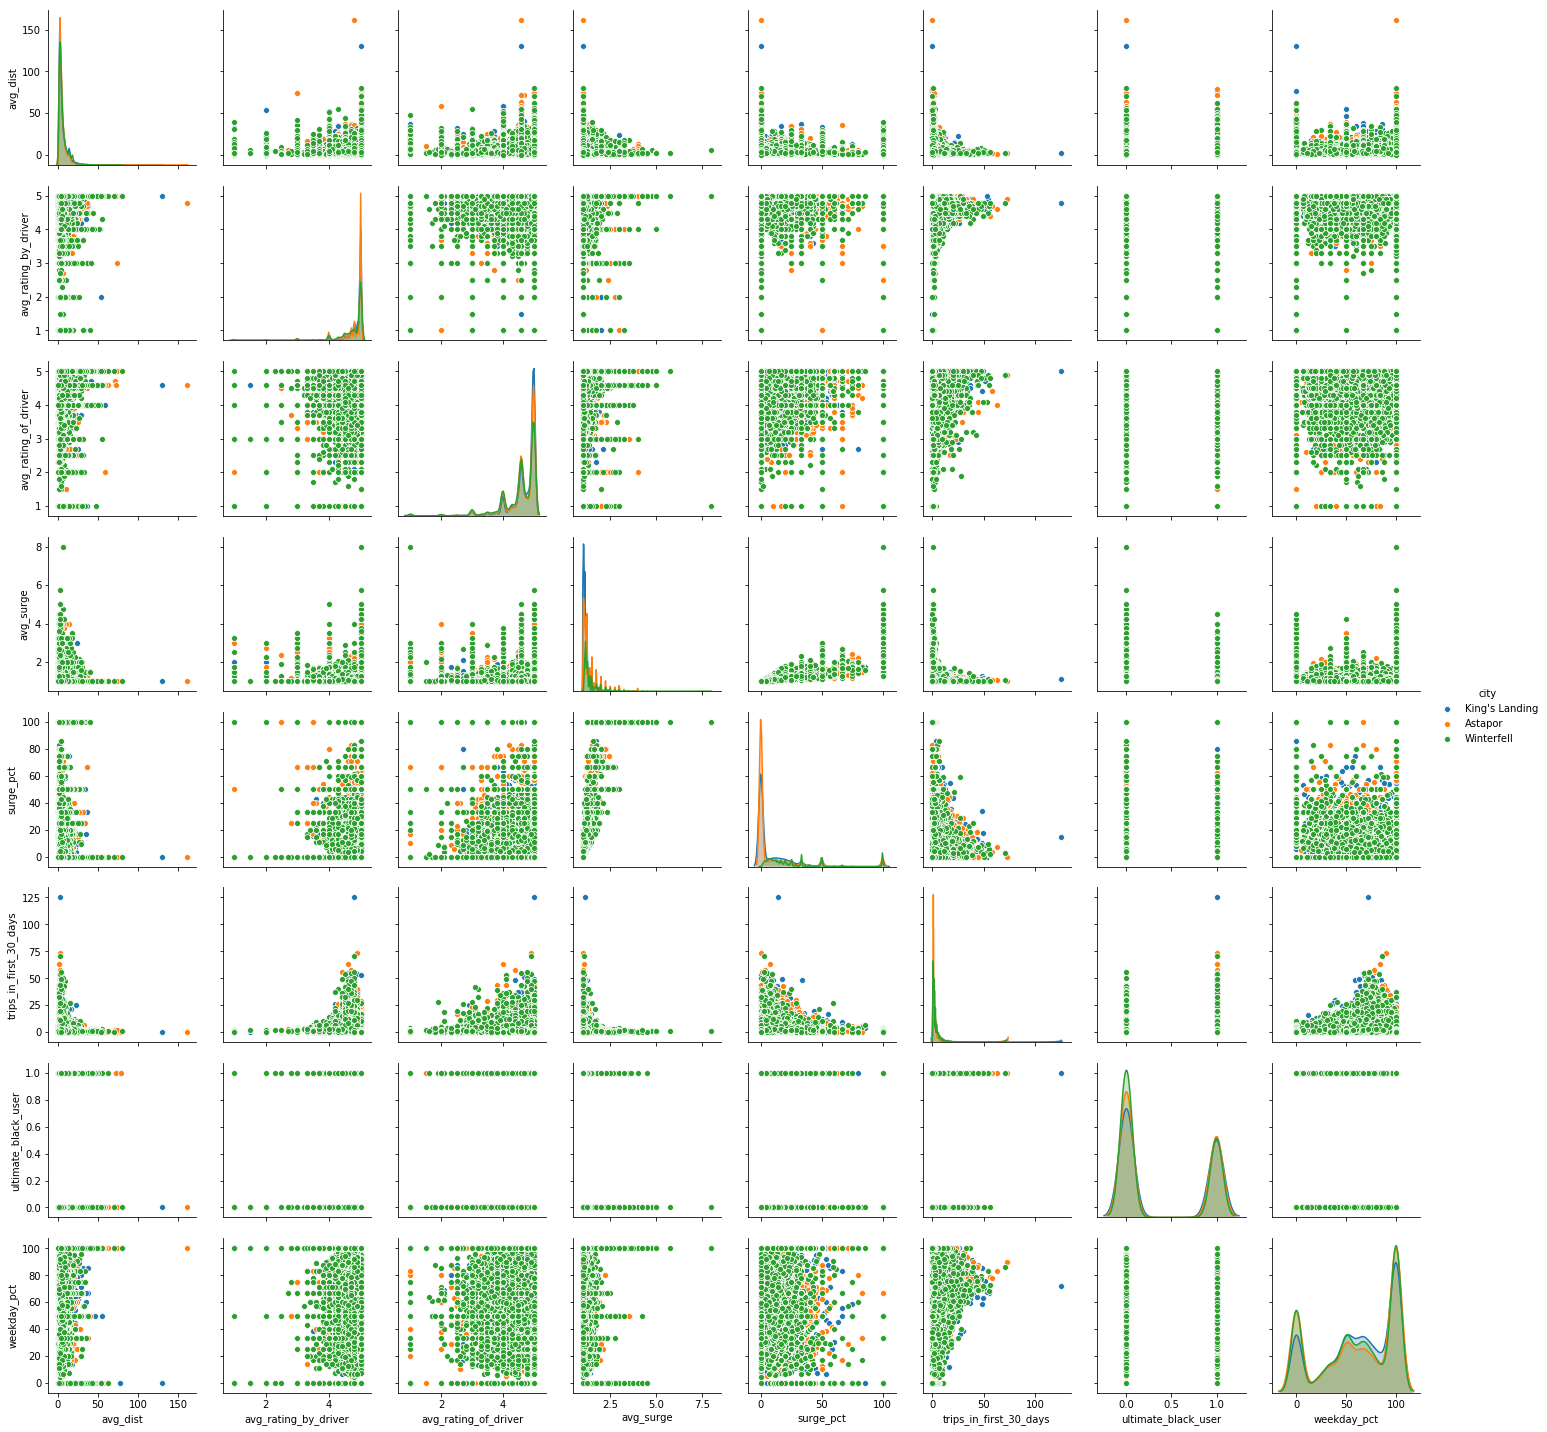

In [13]:
sns.pairplot(df , hue= 'city')

In [14]:
cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct',
       'trips_in_first_30_days', 'weekday_pct']

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


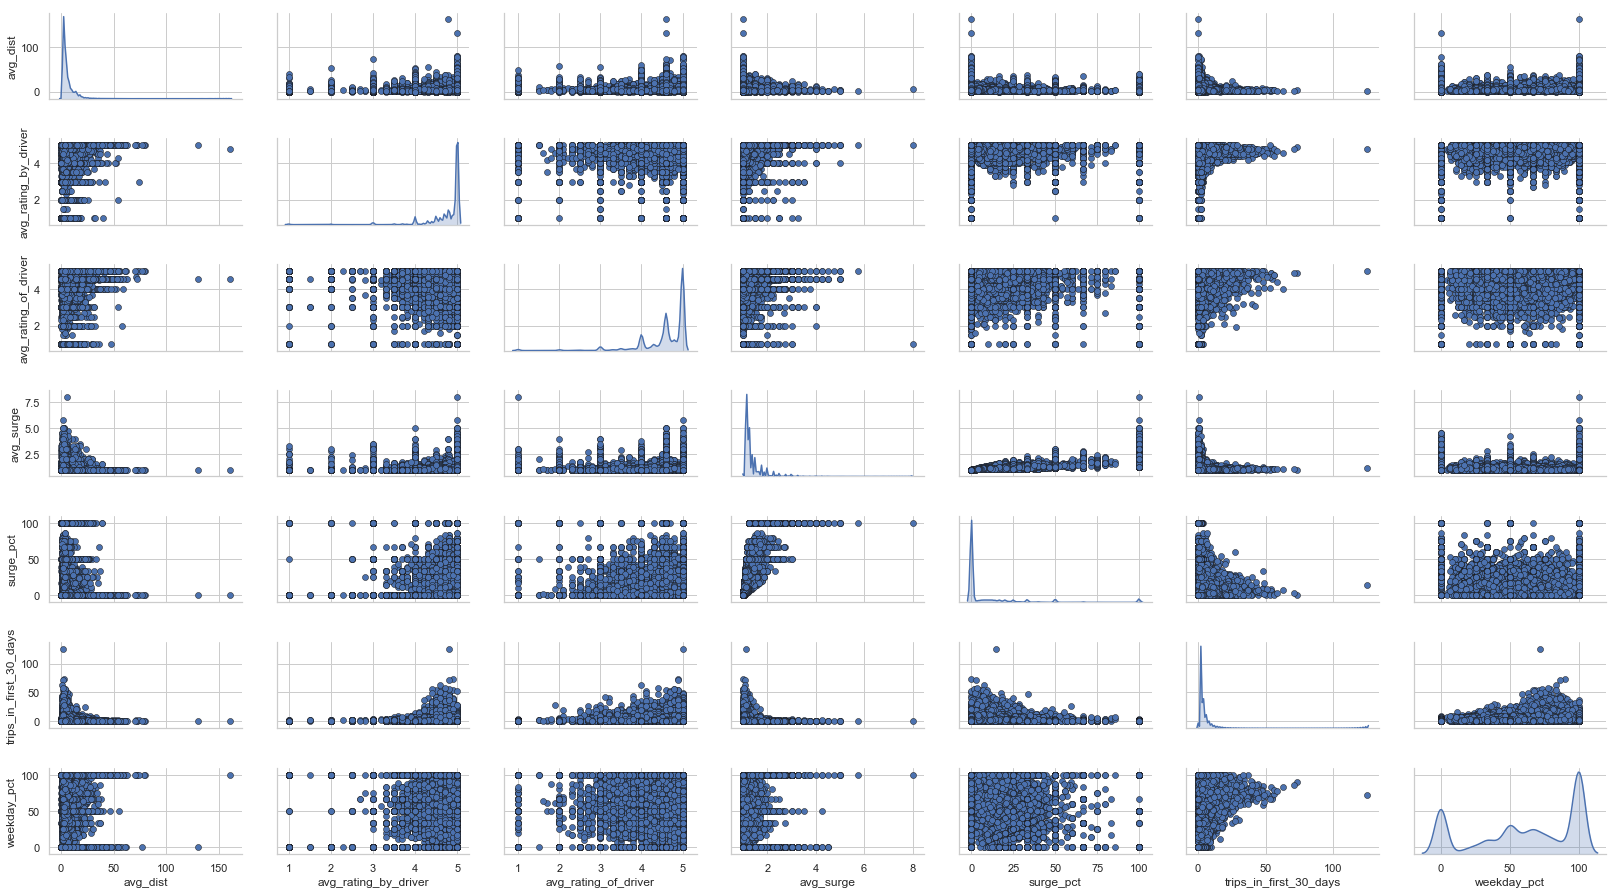

In [75]:
sns.pairplot(df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

In [15]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [18]:
correlation = df.corr()
correlation

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,1.000000,0.079794,0.028373,-0.081491,-0.104414,-0.136329,0.032310,0.101652
avg_rating_by_driver,0.079794,1.000000,0.101651,0.010505,0.019970,-0.039105,0.009321,0.020363
avg_rating_of_driver,0.028373,0.101651,1.000000,-0.021660,-0.003283,-0.010861,-0.001879,0.012609
avg_surge,-0.081491,0.010505,-0.021660,1.000000,0.793582,-0.001841,-0.078791,-0.110071
surge_pct,-0.104414,0.019970,-0.003283,0.793582,1.000000,0.005720,-0.106861,-0.144918
trips_in_first_30_days,-0.136329,-0.039105,-0.010861,-0.001841,0.005720,1.000000,0.112210,0.050388
ultimate_black_user,0.032310,0.009321,-0.001879,-0.078791,-0.106861,0.112210,1.000000,0.035998
weekday_pct,0.101652,0.020363,0.012609,-0.110071,-0.144918,0.050388,0.035998,1.000000


In [17]:
correlation[(abs(correlation) >= 0.50) & (abs(correlation) < 1.0)]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_by_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_of_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_surge,NaN,NaN,NaN,NaN,0.793582,NaN,NaN,NaN
surge_pct,NaN,NaN,NaN,0.793582,NaN,NaN,NaN,NaN
trips_in_first_30_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ultimate_black_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The only two factors that are correlated are "avg_surge"  and "surge_pct" and this was predictable since these two features are highly rleated in a ride being surge or not. 

In [19]:
df['last_trip_date'].sort_values(ascending=False).head(1)

45357   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

In [20]:
round(len(df[df['last_trip_date']> '2014-06-01'])/len(df) , 2)

0.37

Approximately 37% of users were retained. 

In [21]:

df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0

In [22]:
df = pd.get_dummies(df , columns=['city', 'phone', 'ultimate_black_user'])

In [23]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,retaind,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,0,1.0,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0,0.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0,0.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,0,1.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,0,0.0,0,0,1,1,0,1,0


In [24]:
df.drop(['phone_Android', "city_King's Landing", 'ultimate_black_user_False'] , axis=1, inplace=True)

In [28]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,1.0,0,0,1,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0.0,1,0,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0.0,1,0,1,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,1.0,0,0,1,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,0.0,0,1,0,0


In [29]:
df.shape

(50000, 14)

In [30]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'last_trip_date', 'signup_date', 'surge_pct', 'trips_in_first_30_days',
       'weekday_pct', 'retained', 'city_Astapor', 'city_Winterfell',
       'phone_iPhone', 'ultimate_black_user_True'],
      dtype='object')

In [31]:
X = df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days',
       'weekday_pct', 'city_Astapor', 'city_Winterfell',
       'phone_iPhone', 'ultimate_black_user_True']].values
y = df['retained'].values

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=.30, random_state=42)

In [33]:
X_train.shape

(35000, 11)

# Null Accuracy

In [34]:
pd.value_counts(y_test).head(1)/y_test.shape

0.0    0.625267
dtype: float64

In [35]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train , y_train)
pred = nb.predict(X_test)

print (metrics.accuracy_score(y_test, pred))

print (metrics.confusion_matrix(y_test , pred))

0.6444666666666666
[[7256 2123]
 [3210 2411]]


In [40]:
from sklearn.model_selection import cross_val_score

cross_val_score(nb , X , y , cv = 5 , scoring='accuracy').mean()

0.6425799685677996

In [70]:
import scipy as sp 

param_grid = {'alpha' : sp.stats.uniform(scale = 1)}

param_grid

{'alpha': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a6295cf28>}

In [75]:
test = sp.stats.uniform(scale = 1)
test.rvs()

0.395841198137444

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

nb = MultinomialNB()
rand = RandomizedSearchCV(nb , param_grid , cv= 5 , scoring= 'accuracy' , random_state=1 )

In [80]:
rand.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a6295cf28>},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [62]:
rand.best_params_

{'alpha': 0.00011437481734488664}

In [81]:
rand.best_score_

0.6426

In [77]:
grid = GridSearchCV(nb , param_grid = {'alpha' : [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1]} , cv = 5 , scoring='accuracy')

In [64]:
#rand.fit(X, y)
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [197]:
grid.best_score_

0.64258

In [198]:
grid.best_params_

{'alpha': 0.1}

In [205]:
nb = MultinomialNB(alpha= 0.1)
nb.fit(X_train , y_train)
pred = nb.predict(X_test)

print (metrics.accuracy_score(y_test, pred))

print (metrics.confusion_matrix(y_test , pred))

0.6444
[[7255 2124]
 [3210 2411]]


Naive Bayes didnt really work well with our data set, even after tuning hyperparameter alpha it still didn't outperform 64%. 

In [47]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train , y_train)

pred = svm.predict(X_test)

print(metrics.accuracy_score(y_test, pred))

print(metrics.confusion_matrix(y_test, pred))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7562
[[7911 1468]
 [2189 3432]]


In [49]:
kernels = ["linear", "rbf", "poly"]

gammas = [0.1, 1, 10, 100]

c = [0.1, 1, 10, 100, 1000]

degrees = [0, 1, 2, 3, 4, 5, 6]

param_grid = {'gamma': gammas,
               'kernel': kernels,
               'C': c,
               'degree': degrees}

In [51]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(svm , param_grid , n_iter = 3 , cv = 3)

In [52]:
random.fit(X , y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=3, n_jobs=None,
          param_distributions={'gamma': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10, 100, 1000], 'degree': [0, 1, 2, 3, 4, 5, 6]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [53]:
random.best_score_

0.7502

With 75% accuracy, SVM worked better than Naive Bayes. 

In [41]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
cross_val_score(clf , X , y , cv = 5)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

array([0.74352565, 0.7446    , 0.746     , 0.753     , 0.75077508])

In [219]:
clf.fit(X_train , y_train)
pred = clf.predict(X_test)

print (metrics.accuracy_score(y_test, pred))

print (metrics.confusion_matrix(y_test , pred , labels = [0, 1]))

0.741
[[7731 1648]
 [2237 3384]]


In [224]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [227]:
random = RandomizedSearchCV(clf , param_grid , n_iter = 3 , cv = 3)

In [228]:
random.fit(X, y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=3, n_jobs=None,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [229]:
random.best_score_

0.7832

In [230]:
random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [45]:
clf = RandomForestClassifier(n_estimators= 1600,min_samples_split= 10,
                             min_samples_leaf= 4,max_features= 'sqrt',max_depth= 100, bootstrap= True)
 
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, pred))

[[8025 1354]
 [1952 3669]]


In [231]:
clf.feature_importances_

array([0.2948974 , 0.11191872, 0.08305806, 0.05993912, 0.09620995,
       0.08066086, 0.13379399, 0.03466404, 0.035847  , 0.03536413,
       0.03364672])

In [232]:
cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days',
       'weekday_pct', 'city_Astapor', 'city_Winterfell',
       'phone_iPhone', 'ultimate_black_user_True']

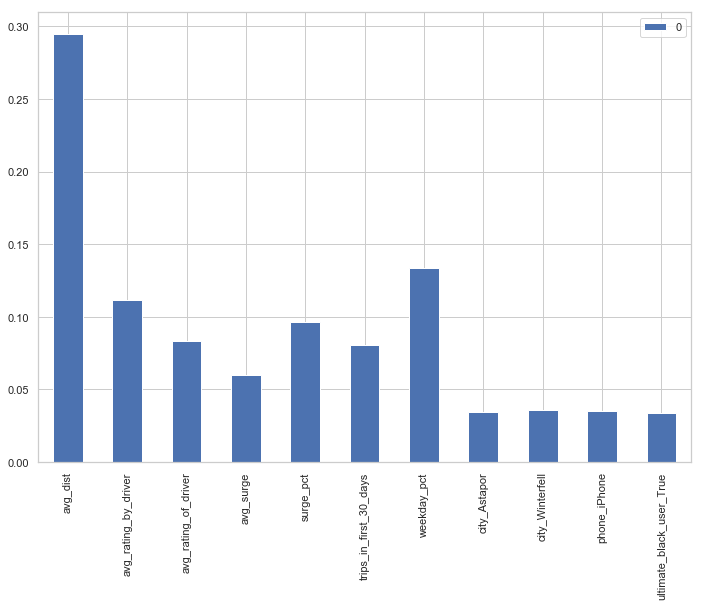

In [236]:
pd.DataFrame(clf.feature_importances_ ,  cols).plot(kind = 'bar')

The best result 78.3% accuracy was the result of RandomizedSearch and Random Forest. Other models didnt work that well. The Null accuracy which could be achieved by always predicting the most frequent class was 62.5%. We were able to train a Random Forest model that gives us 78.3% accuracy. For this specific dataset Naive Bayes worked very poorly with 64% accuracy and very high number of False Negatives. SVM worked rather better, but still with the best hyper parameter tuning couldn't give us better than 75% accuracy. 

# Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

Top three influential features in our model are 'avg_dist', 'weekday_pct' and 'avg_rating_by_driver'. High percentage of trips during the week and long distance trips can tell us perhaps retained riders are commuting for work. Two suggestions can be concluded from that theory: 

1- Increase manpower for morning and evening time slots, two time slots that people need to commute for work the most. 

2- Offer promotions and market more effectively for employees of different businesses to convince them use Ultimate for commuting. 